# Exploring the Dynamics of Real Estate Market in King County.

## Group Members.

Bennie Kibet

Victor Muuo

Chemutai Annolyne

Josphat Wanjiru

Eric Rono

Gladys Mosota

## Overview

The King County Housing Data Set provides information about houses in King County, including their size, location, condition, and other features. The objective of this project is to create a multiple regression model that can accurately predict the price of a house.

The project is commissioned by a commercial real estate company interested in purchasing homes within a specific area. Their main concerns revolve around obtaining predicted prices for homes in the area, and assessing any notable disparities between the actual prices and our model's predicted prices.    

## Business Understanding

The client's primary objective is to develop a platform that can offer precise house price estimates which are paramount for both buyers and sellers in King County.

In order to achieve this, we are required to come up with a model that is capable of deducing the main factors that influence the house prices. In order to train the model effectively, the client seeks to utilize accurate and representative data pertaining to the real estate market in King County. This data contains historical sales, current listings, size of the property and other pertinent features.

The model will be able to make precise estimations of a house's value based on its features upon successful training, the model can be seamlessly integrated into the platform, providing buyers and sellers with reliable estimates of house prices. The information drawn from the model will help both buyers and sellers to make well-informed decisions regarding property transactions.

Harnessing the power of technology by delivering a dependable and accurate platform for house buying and selling in King County, the client can establish themselves as a trusted source in the local real estate market which will then in turn attract a dedicated customer base.   

### Problem Statement

G4 Real Estate faces challenge in effectively entering the dynamic King County real estate market due to the complex interplay of factors influencing housing prices and demand. Understanding the intricate relationship between property features,seasonal trends, and market dynamics is crucial for developing successful market penetration and growth strategies.  

### Objectives:  

1. **Identify key determinants of house prices:**
The goal is to determine which features of a house have the most significant impact on its price in King county.  

2. **Investigating whether large houses tend to have higher prices?**   
The goal is to determine if large houses tend to have high prices in the market.   

3. **Develop a Linear Regression Model to Predict Housing Prices**   
Create a multiple linear regression model using the identified key determinants to predict the house prices. Evaluate the model's performance using appropriate metrics such as R-squared, RMSE, and MAE.


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


# Data Loading

In [2]:
df = pd.read_csv("work\kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **Date** - house was sold
* **Price** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


# EDA and Data Cleaning

In [4]:
#checking data  shape
df.shape
print('Number of rows =', df.shape[0])
print('Number of columns =', df.shape[1])

Number of rows = 21597
Number of columns = 21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# Checking for null values 
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The dataset contains a significant number of NaN values relative to its size (21,597 entries).

    The output indicates the count of missing values (NaN or null values) for each column in King county Housing dataset:

    waterfront has 2376 missing values, View has 63 missing values whereas yr_renovated has 3842 missing values

In [8]:
#'Condition' column transformation
df['condition'].replace(to_replace=['Poor', 'Fair', 'Average', 'Good', 'Very Good'], value=[1, 2, 3, 4, 5], inplace=True)

In [9]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
508.0         1
2500.0        1
3000.0        1
207.0         1
3480.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [10]:
# Changing the sqft_basement from object to int
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

In [11]:
df['has_basement'] = df['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)

In [12]:
df.drop(columns=['sqft_basement','id'], inplace=True)

In [13]:

# Changing the date to datetime
df['date'] = pd.to_datetime(df['date'])

# Extracting only the year from the column 'date' and updating the 'date' column to contain only the year
df['date'] = df['date'].dt.year

# Creating a new column for sell year (same as the year extracted from 'date')
df['sell_yr'] = df['date']

# Dropping the original 'date' column as it is now redundant
df.drop(columns='date', inplace=True)


In [14]:
#'Grade' column transformation
df['grade'].replace(to_replace=['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], value=[7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13], inplace=True)

In [15]:
#'View' column transformation
df['view'].replace(to_replace=['NONE', 'AVERAGE', 'GOOD', 'FAIR', 'EXCELLENT'], value=[0, 1, 2, 3, 4], inplace=True)

In [16]:

# Function to calculate percentage of missing data in a column
def missing_data(df, column):
    length_of_df=len(df)                                                    
    missing_data= column.isna().sum()                                       
    percentage_of_missing_data = round((missing_data/length_of_df*100),2)   
    return print(f"Percentage of Missing Data: {percentage_of_missing_data}""%")

In [17]:
# percentage of missing data
missing_data(df,df["yr_renovated"])


Percentage of Missing Data: 17.79%


##### **Observation:** 
From the above the percentage for missing values for year renovated is significantly high at 17% which would greatly affect the dataset therefore we replace it with the most occuring value in the same column i.e zero(0). 

In [18]:
# Replacing NaN values in yr_renovated column
df["yr_renovated"].fillna(df["yr_renovated"].mode()[0], inplace= True)
df["yr_renovated"].isna().sum()

0

In [19]:
df['age_home'] = 2015 - df['yr_built']

df['yrsince_reno'] = [(2015 - val)  if (val !=0.0) else None for val in df['yr_renovated'] ]
#expression1 if condition else expression2 for item in iterable
df['yrsince_reno'] = df['yrsince_reno'].fillna(df['age_home'])
df.drop(columns=['yr_built', 'yr_renovated'],inplace=True)

In [20]:
# Waterfront missing data
missing_data(df, df['waterfront'])

Percentage of Missing Data: 11.0%


##### **Observation:** 
The Null values account for 11% of the dataset. This constitutes a significant percentage of the dataset therefore instead of to dropping them the missing values for the 'waterfront' column were replaced by the modal value of 'waterfronts' for all houses that share the same 'zipcode'. This method effectively imputes missing data based on the most frequent value within the specified group(zipcodes).

In [21]:

# Function to replace nulls in column waterfront with the mode of waterfront for the same zipcode
def replace_null_with_mode(df, target_col, group_col):
    # Iterating through the rows with null values in the target column
    for index, row in df[df[target_col].isnull()].iterrows():
        # Getting the corresponding group value (zipcode)
        group_value = row[group_col]
        # Filtering the DataFrame to include only rows with the same group value and non-null target values
        filtered_df = df[(df[group_col] == group_value) & df[target_col].notnull()]
        # Getting the mode of the target column in the filtered DataFrame
        mode_value = filtered_df[target_col].mode()
        # Checking if mode_value is not empty
        if not mode_value.empty:
            # Replacing the null value with the mode value
            df.at[index, target_col] = mode_value[0]
    return df

# Replacing nulls in waterfront with the mode of waterfronts for the same zipcode
df = replace_null_with_mode(df, 'waterfront', 'zipcode')

len(df)


21597

In [22]:
df['waterfront'].isna().sum()

0

In [23]:
df['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [24]:
df['view'].value_counts()

0.0    19422
1.0      957
2.0      508
3.0      330
4.0      317
Name: view, dtype: int64

In [25]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [26]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [27]:
#handling missing values in view columns
df['view'].fillna(df['view'].median(), inplace=True)


#dropped remaining missing values in the yr_renovated and sqft_basement columns
#df.dropna(inplace=True)



#Checking for null values
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
has_basement     0
sell_yr          0
age_home         0
yrsince_reno     0
dtype: int64

In [28]:
# checking for duplicates
df.duplicated().sum()

4

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.duplicated().sum()

0

Additional observations
Price column seems to be the price since last sold. This could be an out of date column if it has been a long while since last sold. We should make a 2 features:

    age of home

    how many years since last sold.

Sqft_living15 seems to be an average of the 15 properties around sqft_lot15 seems to be average of 15 lots around

The data is about houses in zipcodes around Seattle, WA.

The dependent variable is Price and min value is 78000 and max is 7,700,000 and a mean of 540296 and median of 450000.

sq_ft living ranges from 370 to 13540 sf ft.

bedrooms range from 1 to 33 with a mean of 3.37 and median of 3.

sqft_lot range from 520 to 1651359.0 with mean of 15099 and median of 7618.

zipcode-70 zipcodes

grade - grade from kings county grading system 3-13

condition- 1 to 5 with 5 being best

view- has been viewed between 0 - 4 times

waterfront- view of waterfront is 0-1, 1 being yes

In [31]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,sell_yr,age_home,yrsince_reno
0,221900.0,3,1.00,1180,5650,1.0,NO,0.0,3,7,1180,98178,47.5112,-122.257,1340,5650,0,2014,60,60.0
1,538000.0,3,2.25,2570,7242,2.0,NO,0.0,3,7,2170,98125,47.7210,-122.319,1690,7639,1,2014,64,24.0
2,180000.0,2,1.00,770,10000,1.0,NO,0.0,3,6,770,98028,47.7379,-122.233,2720,8062,0,2015,82,82.0
3,604000.0,4,3.00,1960,5000,1.0,NO,0.0,5,7,1050,98136,47.5208,-122.393,1360,5000,1,2014,50,50.0
4,510000.0,3,2.00,1680,8080,1.0,NO,0.0,3,8,1680,98074,47.6168,-122.045,1800,7503,0,2015,28,28.0


## EDA
##### Price(target variable)   
High standard deviation indicates a wide range of house prices.   
The median (50% percentile) is lower than the mean, suggesting potential positive skewness (a long tail to the right), which is common in house price data.  
so i might consider log transforming it for a better model  
below lets check relationships between these features and the target variable.

In [32]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,sell_yr,age_home,yrsince_reno
count,2.159300e+04,21593.000000,21593.000000,21593.000000,2.159300e+04,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000
mean,5.403089e+05,3.373269,2.115825,2080.390914,1.510159e+04,1.493956,0.195851,3.409855,7.657759,1788.644283,98077.951327,47.560089,-122.213979,1986.665077,12759.713889,0.406104,2014.322929,44.004168,42.060390
std,3.673972e+05,0.926321,0.769046,918.150846,4.141614e+04,0.539603,0.687269,0.650576,1.173233,827.797775,53.515932,0.138563,0.140722,685.247872,27276.655821,0.491116,0.467607,29.373314,28.944663
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,2014.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000,2014.000000,18.000000,16.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000,2014.000000,40.000000,38.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068700e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1.000000,2015.000000,64.000000,61.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,2015.000000,115.000000,115.000000


In [33]:
df['price_log'] = np.log1p(df['price'])

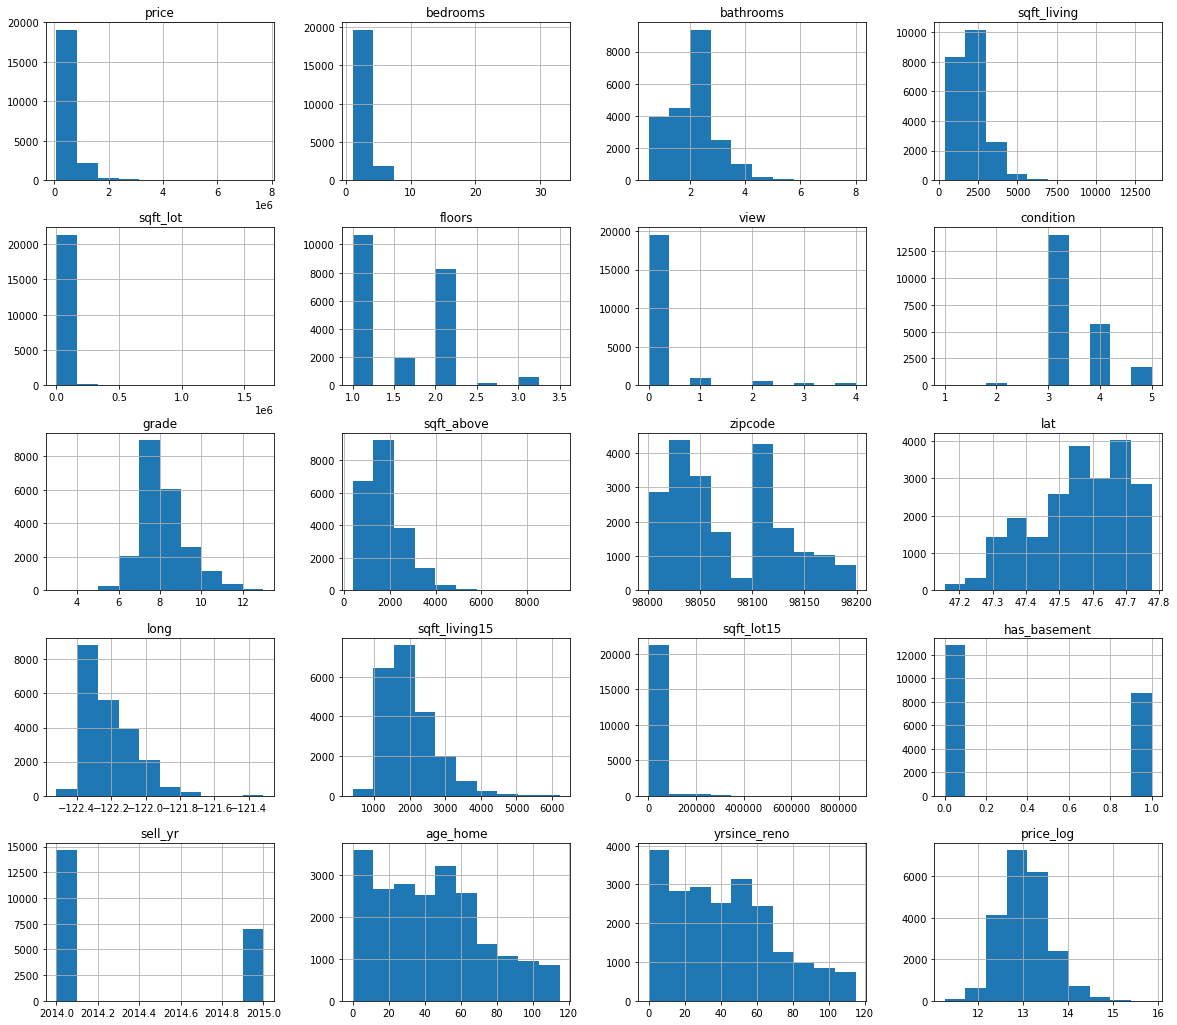

In [34]:
df.hist(figsize = (20,18));

In [35]:
# Splitting the columns based on variable types
categorical_columns = []
numerical_columns = []
for i in df.columns:
    if df[i].dtype == 'O':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)
        
print(f"Categorical columns:",  categorical_columns) 
print(f"Numerical columns:",  numerical_columns) 

Categorical columns: ['waterfront']
Numerical columns: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'has_basement', 'sell_yr', 'age_home', 'yrsince_reno', 'price_log']


#### Observations from the Histograms  

**1. Skewness:** Many features exhibit positive skewness, meaning there are a few extremely high values pulling the tail to the right. Examples include price, sqft_living, sqft_lot, etc.  

**2. Outliers:** Some features, such as price, sqft_living, and sqft_lot, might contain outliers which are data points that deviate significantly from the overall pattern.  

**3. Multimodality:** Some features, like zipcode, might exhibit multimodality, indicating multiple clusters or groups within the data.   

**4. Range:** The range of values for each feature varies significantly. Some features have a wide range (e.g., price, sqft_living), while others have a narrower range (e.g., floors, waterfront).

considering these observations 
Before proceeding with the most affecting features we have to handle the outliers first  inorder to know what to do with them before proceeding.  


## Checking for outliers

In [36]:
# Outlier Analysis
# defining a function for plotting boxplot
def boxplot_graph(df1, number_of_columns, columns_to_plot):

    # Creating subplots
    num_columns = len(columns_to_plot)

    # Number of rows and columns for subplots
    ncols = number_of_columns
    nrows = math.ceil(num_columns/ ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 20))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plotting each column in a separate subplot
    for i, column in enumerate(columns_to_plot):
        sns.boxplot(y=df1[column], color="r", ax=axes[i])
        axes[i].set_title(column)

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust the layout to add space between rows
    plt.subplots_adjust(hspace=3) 

    plt.suptitle('Box Plots of Different Columns')
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
    return plt.show()




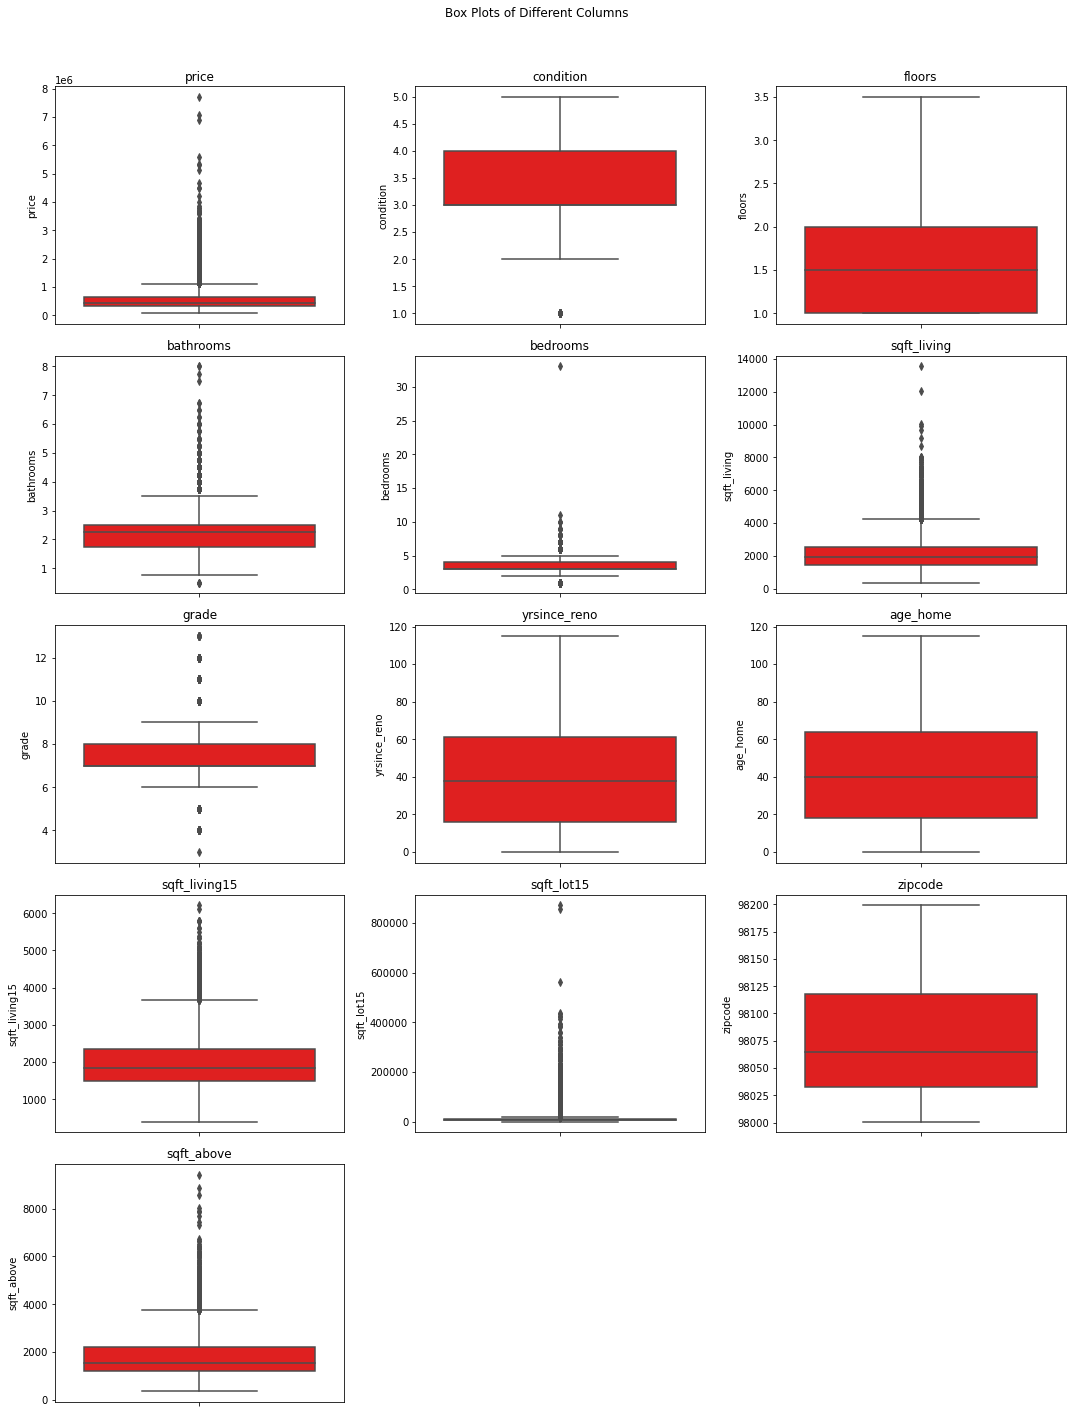

In [37]:
# Plotting the boxplot for the defined columns
columns_to_plot = ['price', 'condition', 'floors', 
                    'bathrooms', 'bedrooms', 'sqft_living', 
                    'grade', 'yrsince_reno', 'age_home', 
                    'sqft_living15', 'sqft_lot15','zipcode',
                    'sqft_above']
boxplot_graph(df, 3, columns_to_plot)

**Price:** A significant number of outliers, indicating exceptionally high-priced houses.   
**Bedrooms:** A few potential outliers with extremely high bedroom counts.
**Sqft_living and sqft_lot:** Multiple outliers, suggesting unusually large houses.  
**Waterfront:** Potential outliers, possibly indicating properties with unique waterfront characteristics.   
**View:** Some outliers, suggesting properties with exceptionally good views.   
**Grade:** A few potential outliers representing exceptionally high-grade properties.  
**Sqft_above and sqft_basement:** Some outliers, indicating unusually large above-ground or basement areas.  

but considering this is based on real data we will avoid removing outliers as it will not give accurate insight to the dataset

In [38]:
# Listing the number of bedrooms in descending order and identifying zipcode with the outlier number of bedrooms
df = df.sort_values(by='bedrooms', ascending=False).reset_index(drop=True)
print(df[['zipcode','bedrooms']])
print(df.shape)

       zipcode  bedrooms
0        98103        33
1        98106        11
2        98105        10
3        98006        10
4        98004        10
...        ...       ...
21588    98115         1
21589    98118         1
21590    98126         1
21591    98014         1
21592    98136         1

[21593 rows x 2 columns]
(21593, 21)


#### **Observation**

one house has an extreneous value of 33 bedrooms. The value is replace by the median value all houses with the corresponding zipcodes

In [39]:

# Filtering locations with zipcode 98103 similar to the house with an outlier of 33 bedroms as shown above 
filtered_df = df[df['zipcode'] == 98103].reset_index()
filtered_df.sort_values(by='bedrooms', ascending=False).reset_index()

# getting the median value for houses in zipcode 98103
median_bedrooms = filtered_df['bedrooms'].median()
print('The median value for houses in zipcode 98103 is', median_bedrooms)
print('-------------------------')
# Zipcode and number of bedrooms in that zipcodes
print(filtered_df[['zipcode','bedrooms']])


# Replacing a the outlier house with outlier bedrooms with the median for the houses in the zicode
df['bedrooms'] = df['bedrooms'].replace(33, median_bedrooms)

#filtering zip code 98103
df_clean_1 = df[df['zipcode'] == 98103].reset_index()

print('-------------------------')

#rechecking shape of the cleaned dataframe
print(df[['zipcode','bedrooms']])

df_clean_1.shape
df.shape


The median value for houses in zipcode 98103 is 3.0
-------------------------
     zipcode  bedrooms
0      98103        33
1      98103         9
2      98103         7
3      98103         6
4      98103         6
..       ...       ...
597    98103         1
598    98103         1
599    98103         1
600    98103         1
601    98103         1

[602 rows x 2 columns]
-------------------------
       zipcode  bedrooms
0        98103         3
1        98106        11
2        98105        10
3        98006        10
4        98004        10
...        ...       ...
21588    98115         1
21589    98118         1
21590    98126         1
21591    98014         1
21592    98136         1

[21593 rows x 2 columns]


(21593, 21)



*Bivariate Analysis*

In this section, we will perform bivariate analysis to examine the relationship between the target variable - price and the other numeric and continuous features in the data. We will use scatter plots to show the direction, strength, and shape of the relationship between two numeric variables. This will help us understand how one variable affects or is affected by another variable and identify any patterns or trends that may exist.

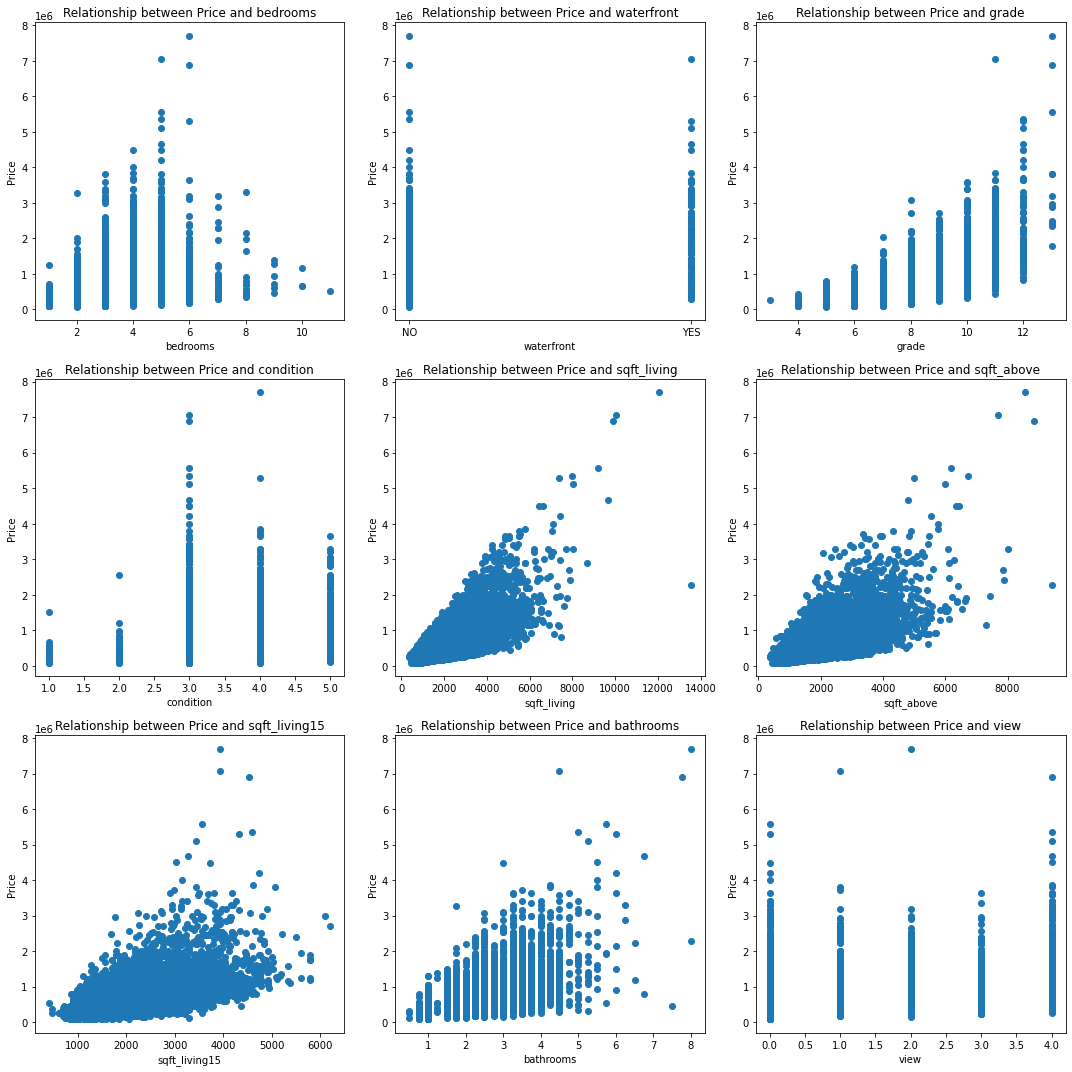

In [40]:
# Examine the relationships between 'price' and several independent variables through scatter plots
variables = ['bedrooms', 'waterfront', 'grade', 'condition', 'sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'view']
num_rows = math.ceil(len(variables) / 3)  # Calculate the number of rows for the subplots

# Set up a grid of subplots for visualizing relationships
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# Plot scatter plots to explore how each independent variable affects 'price'
for i, var in enumerate(variables):
    row = i // 3  # Compute the row index
    col = i % 3   # Compute the column index
    axes[row, col].scatter(df[var], df['price'])
    axes[row, col].set_xlabel(var)  # X-axis label
    axes[row, col].set_ylabel('Price')  # Y-axis label
    axes[row, col].set_title(f'Relationship between Price and {var}')  # Plot title

# Adjust layout to avoid overlap of subplots
plt.tight_layout()
plt.show()


•	The output of the scatter plots shows the relationship between the target variable (price) and the independent variables (bedrooms, waterfront, grade, condition, sqft_living, sqft_above, sqft_living15, bathrooms, view) in the dataset.

-	bedrooms: There is a positive relationship between the number of bedrooms and the price of a house. This means that houses with more bedrooms tend to be more expensive.

-	waterfront: There is a positive relationship between waterfront property and the price of a house. This means that houses with waterfront views tend to be more expensive.

-	grade: There is a positive relationship between the grade of a house and the price of a house. This means that houses with higher grades tend to be more expensive.

-	ncondition: There is a positive relationship between the condition of a house and the price of a house. This means that houses in better condition tend to be more expensive.

-	sqft_living: There is a positive relationship between the square footage of a house and the price of a house. This means that houses with more square footage tend to be more expensive.

-	sqft_above: There is a positive relationship between the square footage of the above-ground living space in a house and the price of a house. This means that houses with more square footage in the above-ground living space tend to be more expensive.

-	sqft_living15: There is a positive relationship between the square footage of the living space in a house 15 years ago and the price of a house today. This means that houses that were larger 15 years ago tend to be more expensive today.

-	bathrooms: There is a positive relationship between the number of bathrooms in a house and the price of a house. This means that houses with more bathrooms tend to be more expensive.

-	view: There is a positive relationship between the view from a house and the price of a house. This means that houses with better views tend to be more expensive.


•	The scatter plots show that there is a positive relationship between most of the independent variables and the price of a house. This means that houses with higher values for these variables tend to be more expensive. The only exception is the variable "view", which has a positive relationship with price, but the relationship is not as strong as the relationships for the other variables.


**Below cell code is Checking for multicollinearity**

*Multivariate analysis*

In this section, we will perform multivariate analysis to examine the relationship between the target variable - price and multiple features in the data. We will use heatmap to visualize the correlation matrix of the features and see how they are related to each other and to the price.

A heatmap can show us the strength and direction of the correlation between two variables using different colors and shades. This will help us identify the most important features for the prediction and avoid multicollinearity problems.

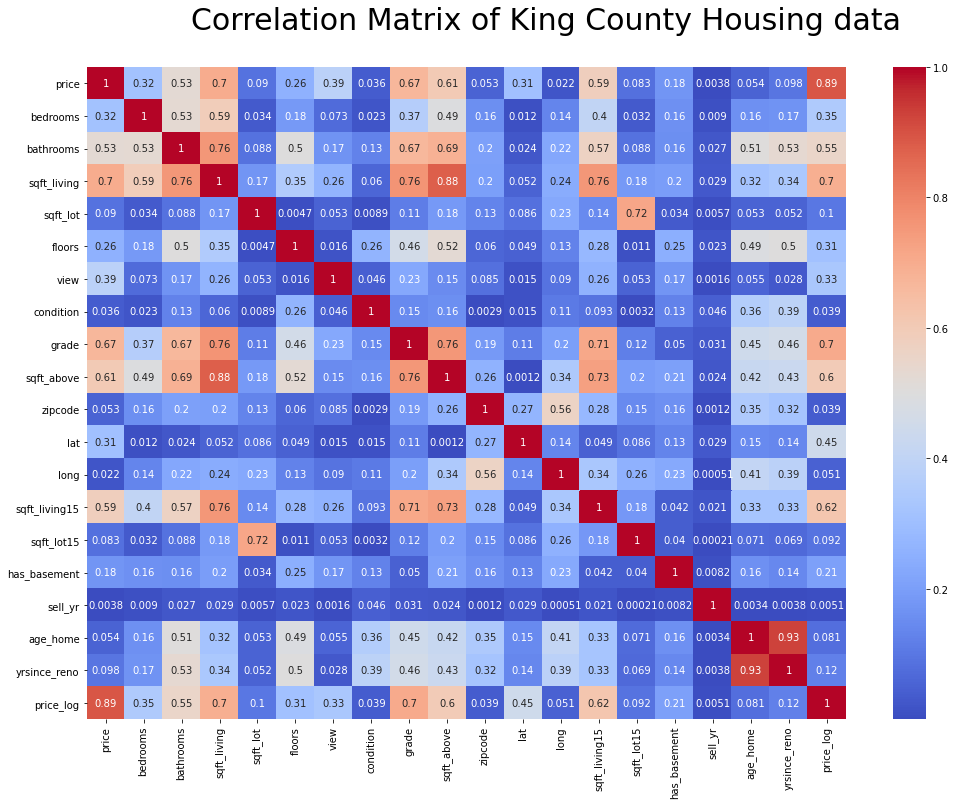

In [41]:
# plot heatmap to show the relationship between various variables
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Correlation Matrix of King County Housing data', fontsize=30, y=.95, fontname='DejaVu Sans')
heatmap = sns.heatmap(corr, cmap='coolwarm', annot=True)
heatmap;

Based on the correlation coefficients with price and price_log from the  dataset, the most important features are:   

**sqft_living** - square footage of the home  
        Justification: A strong positive correlation with price, (0.695185). indicating that larger houses tend to be more expensive.

**sqft_above** -  square footage of house apart from basement
        Justification: A significant positive correlation,( 0.601579). implying that the size of the above-ground living area impacts price

**grade** - overall grade given to the housing unit, based on King County grading system
        Justification: A high correlation (0.703720). suggesting that higher-graded houses command higher prices.

**bathrooms** - Number of bathrooms/bedrooms
        Justification: A moderate positive correlation, (0.551249). indicating that more bathrooms tend to increase the property value.  
    
**bedroooms** - Number of bedrooms/house
        Justification: A moderate  correlation, (0.350855). i might merge this with bathroom.  

**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
        Justification: A positive correlation, (0.619326). that houses with larger square footage tend to be surrounded by other houses with larger square footage, But I will go with sqft_living.  
#### might consider in my model to check the behaviour of my model   
**waterfront** - House which has a view to a waterfront
        Justification: A Low correlation (0.17). suggesting that waterfront properties command higher prices 

In [42]:
df_selected = df[['sqft_living','sqft_above','grade','bathrooms','bedrooms','price_log']]
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21593 entries, 0 to 21592
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  21593 non-null  int64  
 1   sqft_above   21593 non-null  int64  
 2   grade        21593 non-null  int64  
 3   bathrooms    21593 non-null  float64
 4   bedrooms     21593 non-null  int64  
 5   price_log    21593 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 1012.3 KB


### Analysis 1. **Identify key determinants of house prices:**
The goal is to determine which features of a house have the most significant impact on its price in King county.

    **Answer:** sqft_living, sqft_above, grade, bathrooms, bedrooms are the most important features. These features have a strong positive correlation with price, indicating that larger houses tend to be more expensive. sqft_living15 is also a significant feature, but it is calculated on the nearest 15 neighbors, which might not be as relevant to the overall property value as the other features.

### Analysis 2. **Investigating whether large houses tend to have higher prices?** 

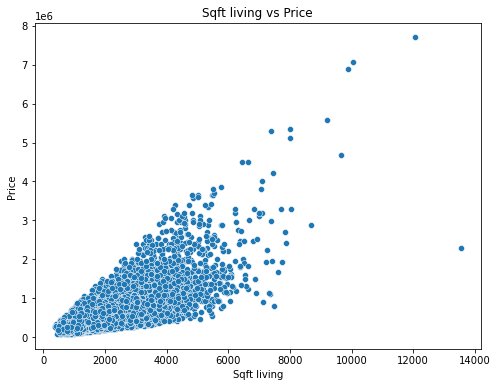

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Sqft living vs Price')
plt.xlabel('Sqft living')
plt.ylabel('Price')
plt.show()

**Trend observation**

    Positive Correlation: There is a clear positive correlation between sqft_living and price. As the living area increases, the house price also tends to increase. This is evident from the upward trend in the scatter plot.

**Implication**

    This suggests that larger homes generally command higher prices, which is important for pricing strategies and setting client expectations.

Although there is price variation, smaller houses (with sqft_living below 2,000) have less variation in price compared to larger houses. As the size increases, the variation in price also increases, suggesting that other factors might also play a role in determining the price of larger houses.


## Analysis 3: Develop a Linear Regression Model to Predict Housing Prices

In [44]:

def linear_regression_model(X, y, test_size=0.2, random_state=42):
 

  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

  # Scale features
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Create and train the model
  model = LinearRegression()
  model.fit(X_train_scaled, y_train)

  # Make predictions
  y_pred = model.predict(X_test_scaled)

  # Evaluate the model
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print('model:',model,'mse:', mse, 'mae:',mae, 'r2:',r2)


**Baseline model**

In [45]:
X = df[['sqft_living']]
y = df['price_log']
linear_regression_model(X, y, test_size=0.2, random_state=1000)


model: LinearRegression() mse: 0.14559899577705643 mae: 0.311178292576963 r2: 0.4729650005826638


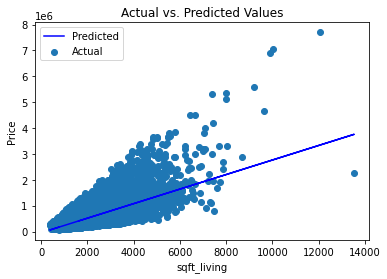

In [46]:
# Fit the simple linear regression model
X = df['sqft_living']  # Independent variable
y = df['price']  # Dependent variable
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X)  # Create the ordinary least squares model
results = model.fit()  # Fit the model to the data

# Visualize the linearity
plt.scatter(X['sqft_living'], y, label='Actual')  # Scatter plot of actual values
plt.plot(X['sqft_living'], results.predict(), color='blue', label='Predicted')  # Line plot of predicted values
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

We have developed an initial baseline model to predict house prices using the living area (sqft_living) as the sole predictor. While this model explains approximately 48.78% of the variance in house prices, there is significant room for improvement. The model's predictions have an average error (MAE) of approximately 0.3051 units, and the overall accuracy can be enhanced by considering additional factors.

Based on our feature selection

In [47]:
df_selected.corr()

,sqft_living,sqft_above,grade,bathrooms,bedrooms,price_log
sqft_living,1.000000,0.876442,0.762956,0.755810,0.593145,0.695189
sqft_above,0.876442,1.000000,0.756242,0.686706,0.492501,0.601560
grade,0.762956,0.756242,1.000000,0.665887,0.366329,0.703826
bathrooms,0.755810,0.686706,0.665887,1.000000,0.527936,0.551265
bedrooms,0.593145,0.492501,0.366329,0.527936,1.000000,0.350816
price_log,0.695189,0.601560,0.703826,0.551265,0.350816,1.000000


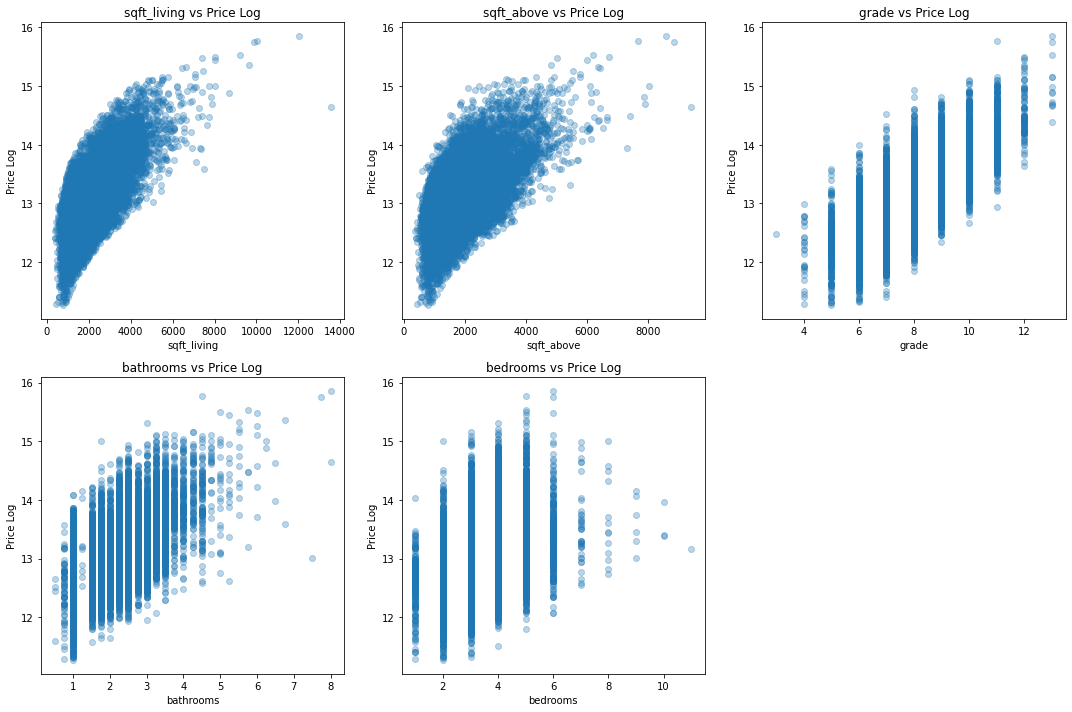

In [48]:
# Linearity
num_features = len(df_selected.columns) - 1
num_cols = 3  
num_rows = (num_features + num_cols - 1) // num_cols 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
axes = axes.flatten()  # Flatten the array of axes for easy iteration
# Plot each feature against 'price_log'
for idx, feature in enumerate(df_selected.columns):
    if feature != 'price_log':
        ax = axes[idx]
        ax.scatter(df_selected[feature], df_selected['price_log'], alpha=0.3)
        ax.set_xlabel(feature)
        ax.set_ylabel('Price Log')
        ax.set_title(f'{feature} vs Price Log')
for idx in range(num_features, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

**Model 1**

In [49]:
X = df_selected.drop('price_log',axis=1)
y = df_selected['price_log']
linear_regression_model(X, y, test_size=0.2, random_state=42)

model: LinearRegression() mse: 0.1162188951789486 mae: 0.2722363510096844 r2: 0.5439712942866779


**Model 2**

In [50]:
df_selected2 = df[['sqft_living','sqft_above','grade','bathrooms','bedrooms','price_log','view','condition','waterfront','yrsince_reno']]

In [51]:
numerical_cols = df_selected2.select_dtypes(include=['int64', 'float64']).columns
df_numerical = df_selected2[numerical_cols]
df_categorical = df['waterfront']
dummies = pd.get_dummies(df_categorical)
dummies = dummies.astype(np.uint8)
df_selected2 = pd.concat([df_numerical, dummies], axis=1)
df_selected2.columns

Index(['sqft_living', 'sqft_above', 'grade', 'bathrooms', 'bedrooms',
       'price_log', 'view', 'condition', 'yrsince_reno', 'NO', 'YES'],
      dtype='object')

In [52]:
X2 = df_selected2.drop(['price_log'],axis=1)
y = df_selected2['price_log']
linear_regression_model(X2, y, test_size=0.2, random_state=42)

model: LinearRegression() mse: 0.09994733389718902 mae: 0.25174208308193496 r2: 0.6078189071884387


**Model 3**

In [53]:
df_selected3 =df[['bedrooms','bathrooms','condition','sqft_living','sqft_living15','grade','age_home','price_log','lat','long','zipcode']]

In [54]:
df_selected3 = pd.concat([df_selected3, dummies], axis=1)

In [55]:
X3 = df_selected3.drop(['price_log'],axis=1)
y = df_selected3['price_log']
linear_regression_model(X3, y, test_size=0.2, random_state=42)

model: LinearRegression() mse: 0.0645459516841363 mae: 0.1993512786564516 r2: 0.7467295936669427


## Model diagnostic

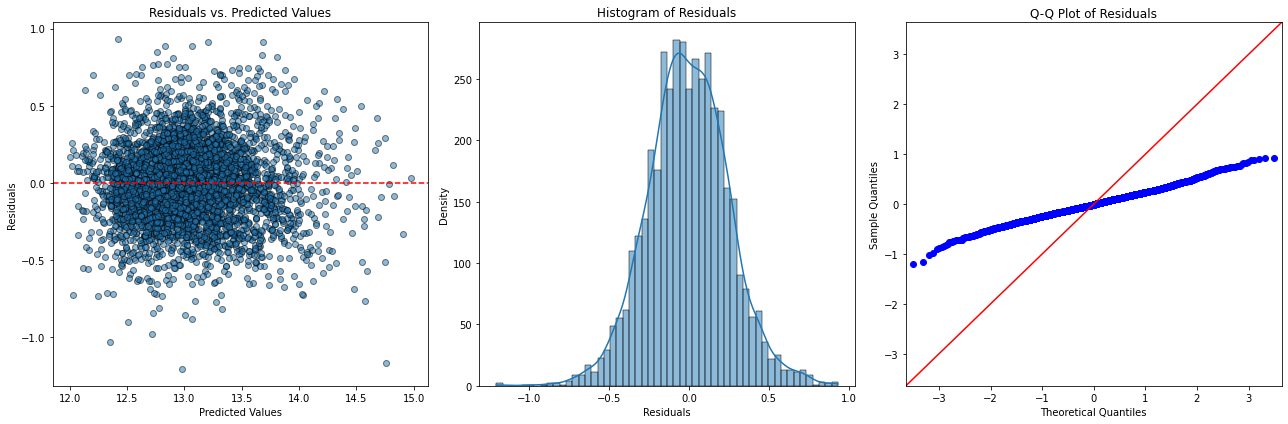

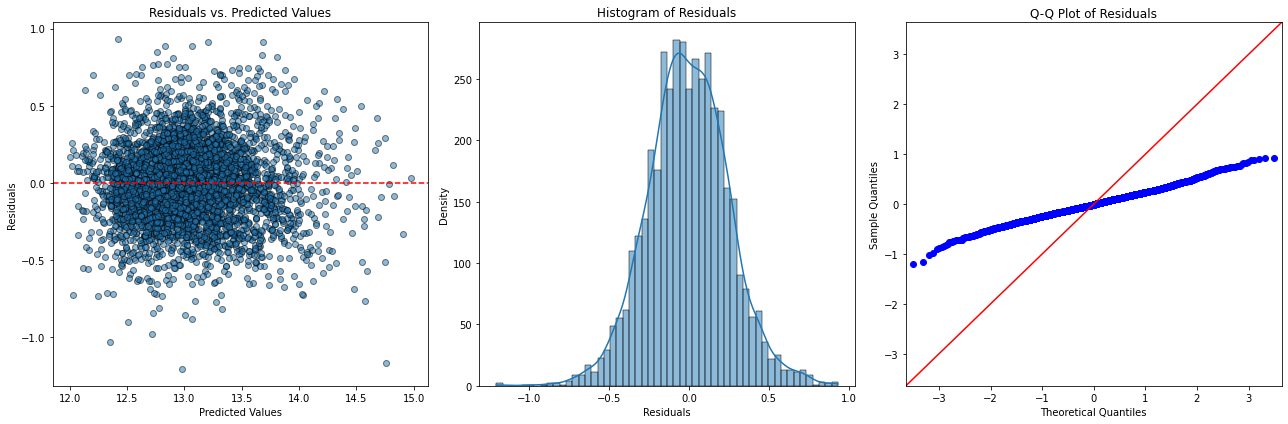

In [56]:
# Function to fit a linear regression model
def linear_regression_model(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    return X_test, y_test, y_pred, residuals, model
# Function to create residual plots
def simple_model_diagnostic(X, y, model):
    y_pred = model.predict(X)
    residuals = y - y_pred
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Residuals vs. Predicted Values
    axes[0].scatter(y_pred, residuals, alpha=0.5, edgecolors='k')
    axes[0].axhline(y=0, color='r', linestyle='--')
    axes[0].set_xlabel('Predicted Values')
    axes[0].set_ylabel('Residuals')
    axes[0].set_title('Residuals vs. Predicted Values')
    # Histogram of Residuals
    sns.histplot(residuals, kde=True, ax=axes[1])
    axes[1].set_xlabel('Residuals')
    axes[1].set_ylabel('Density')
    axes[1].set_title('Histogram of Residuals')
    
    # Q-Q Plot of Residuals
    sm.qqplot(residuals, line='45', ax=axes[2])
    axes[2].set_title('Q-Q Plot of Residuals')
    
    plt.tight_layout()
    plt.show()

# Prepare data
X3 = df_selected3.drop('price_log', axis=1)
y = df_selected3['price_log']
# Fit the model and get predictions and residuals
X_test, y_test, y_pred, residuals, model = linear_regression_model(X3, y, test_size=0.2, random_state=42)

# Run diagnostic plots
simple_model_diagnostic(X_test, y_test, model)

# Fit the model and get predictions and residuals
X_test, y_test, y_pred, residuals, model = linear_regression_model(X3, y, test_size=0.2, random_state=42)

# Run diagnostic plots
simple_model_diagnostic(X_test, y_test, model)

Conclusions

Model Performance: The model appears to be well-fitting based on the diagnostic plots. The residuals are randomly scattered, and both the histogram and Q-Q plot suggest that residuals are approximately normally distributed.

Model Adequacy: Given these results, the log-transformed price model is effective and satisfies the key assumptions of linear regression.

# Conclusions.
## Objective 1: 
Identify key determinants of house price.

**conclusion:**
* **Findings:** Key determinants identified influencing house pricing in King county were; sqft_living, sqft_above, grade, bathrooms and bedrooms. These features had a moderate to strong positive correlation with price with sqft_living and grade showing the strongest correlation of 0.7 each.

* **Implication:** Larger living areas (sqft_living) strongly correlate with increased house prices, underscoring buyer preference for spacious homes. Similarly, higher grade ratings are linked to elevated property values, reflecting superior quality and design standards. Additionally, features such as sqft_above (upper floors area), number of bathrooms, and bedrooms also play significant roles in determining house prices, albeit their influence is somewhat less pronounced compared to sqft_living and grade. These findings highlight key factors that stakeholders in the King County housing market should consider when evaluating property values and investment opportunities. 


## Objective 2: 
Investigating whether large houses tend to have higher prices?

**conclusion:**
* **Findings:** The LinearRegression model shows a strong relationship between sqft_living and house prices in King County. The scatter plot and regression line illustrate this. An R-squared value of 0.4878 means 48.78% of price variability is explained by sqft_living. As sqft_living increases, house prices rise, highlighted by the model's positive coefficient. This emphasizes the importance of living area size in property values, aiding stakeholders in real estate decisions.

* **Implications:**  Buyers place a significant value on larger living areas, as evidenced by the positive correlation with house prices. This suggests that properties with more spacious interiors are likely to command higher prices in the market.


## Objective 3: 
Develop a Linear Regression Model to Predict Housing Prices

**conclusion:**
* **Findings:** The best fit linear regression model, incorporating features contained in model 3, achieves an R-squared (R2) score of 0.76 on the test set. This indicates that 76% of the variance in housing prices can be explained by these predictors.

* **Implications** The robust LinearRegression model offers real estate market players in King County a powerful tool for accurately predicting housing prices based on property characteristics like sqft_living. This predictive capability enables informed advice to buyers, facilitating strategic decisions on property purchases and investment potential. Furthermore, the model supports effective pricing strategies and urban development planning by providing valuable insights into market trends and demand dynamics for larger living spaces.

## Recommendation.

1. Evaluate Property Potential: When evaluating properties, focus on the sqft_living as a key determinant of market value. Real estate developers and investors should consider developing or investing in properties with larger living spaces as these would fetch them higher returns.

2. Market Positioning: Use the insight gained from the regression analysis to strategically position properties in the market. Highlight larger living areas as a selling point that can justify higher asking prices or premium listings.

3. Continuous Improvement: The model, while robust, can always be refined further. Continuous data collection and model updates can help maintain and potentially improve accuracy over time.